In [20]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [7]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [3]:
import pandas as pd

In [4]:
data = pd.read_pickle('ICAAD.pkl')

In [5]:
data.columns

Index(['title', 'text', 'id', 'Year', 'Court', 'Domestic.Violence',
       'Domestic.Violence.Manual', 'Sexual.Assault', 'Sexual.Assault.Manual',
       'Non.SA.DV.case', 'Strength.of.DV', 'Strength.of.SA',
       'Strength.of.non.SA.DV.case', 'Family.Member.Victim', 'Crimes.Decree',
       'Criminal.Procedure.Decree', 'Sentencing.and.Penalties.Decree',
       'Domestic.Violence.Decree', 'DV.Restraining.Order', 'Penal.Code',
       'Restraining.order', 'Reconciliation', 'Reconciliation_freq',
       'Reconciliation_syn', 'Attempt.to.rape', 'Rape', 'Defilement',
       'Assault.Causing.Harm', 'Incest', 'Age', 'Topic4', 'Evidence.of.DV',
       'Evidence.of.SA', 'Evidence.of.non.SA.DV'],
      dtype='object')

In [6]:
data_filtered = data[data['Sexual.Assault.Manual'] | data['Domestic.Violence.Manual']]

In [127]:
text = data_filtered.loc[7927, 'text']

In [124]:
#m = re.split(r'(?<![Aa]ct)( \(?[0-9ivx]{1,2}[\.\]\)] )', text)
def pretty_print(text):
    m = re.split(r'(?<=[][\."]|E|S)( \(?[0-9ivx]{1,2}[\.\]\)] )', text)
    print(len(m))
    if len(m) == 1:
        m = re.split(r'(?<=[A-Za-z0-9 ]{5}[\."])( )', text)
        print(len(m))
    for line in m:
        print(line, '\n')
        
        
pretty_print(text)

1
197
----------------- IN THE HIGH COURT OF FIJI AT SUVA CIVIL JURISDICTION Civil Action No. 

  

30 of 2014 BETWEEN: DIGICEL (FIJI) LIMITED, a limited liability company having its business address and its registered address at Ground Floor, Kadavu House, Suva, Fiji Islands. 

  

PLAINTIFF AND: FIJI RUGBY UNION, a sports association having its business address at Fiji Rugby Union House, 35 Gordon Street, Suva, Fiji Islands. 

  

DEFENDANT BEFORE : Hon. Justice Kamal Kumar COUNSEL : Dr J. 

  

Turner and Ms M. 

  

Muir for the Plaintiff/Respondent Mr N. 

  

Lajendra for the Defendant/Applicant DATE OF RULING : 21 February 2014 RULING (Application for Stay of Proceedings) 1.0 Introduction 1.1 On 11 February 2013 the Defendant/Applicant filed by way of Summons, Application for an Order that the within proceedings be stayed upon the grounds that the parties had agreed pursuant to Clause 25 of the Sponsorship Agreement dated 14 August 2009 between the parties that any dispute will 

In [25]:
@np.vectorize
def contains_rape(text):
   return 'rape' in "text".lower()


In [37]:
Funktion som destilerar texten.
väljer ut vissa faktorer
Maxstraffet years
last ocurrence "sentence of blabla years"

SyntaxError: invalid syntax (<ipython-input-37-178e3d30ac15>, line 1)

In [9]:
data.columns

Index(['title', 'text', 'id', 'Year', 'Court', 'Domestic.Violence',
       'Domestic.Violence.Manual', 'Sexual.Assault', 'Sexual.Assault.Manual',
       'Non.SA.DV.case', 'Strength.of.DV', 'Strength.of.SA',
       'Strength.of.non.SA.DV.case', 'Family.Member.Victim', 'Crimes.Decree',
       'Criminal.Procedure.Decree', 'Sentencing.and.Penalties.Decree',
       'Domestic.Violence.Decree', 'DV.Restraining.Order', 'Penal.Code',
       'Restraining.order', 'Reconciliation', 'Reconciliation_freq',
       'Reconciliation_syn', 'Attempt.to.rape', 'Rape', 'Defilement',
       'Assault.Causing.Harm', 'Incest', 'Age', 'Topic4', 'Evidence.of.DV',
       'Evidence.of.SA', 'Evidence.of.non.SA.DV'],
      dtype='object')

In [10]:
data_filtered.loc[20, ['Crimes.Decree', 'Penal.Code']]

Crimes.Decree    False
Penal.Code       False
Name: 20, dtype: object

In [47]:
import re

year_list = [] # list to be filled with years
for index, row in data_filtered.iterrows():
    lowercase = row['text'].lower()
    years_raw = re.findall(r'[0-9]+ years*', lowercase) #match regular expression
    if(len(years_raw) > 0):
        years = int(years_raw[-1].split(' ')[0])
        year_list.append(years)
        print('index:', index, 'years:', years)
    else:
        year_list.append(0) # Add zeros if we did not find any years
data_filtered.loc[:,'Sentence.Years'] = pd.Series(np.array(year_list), index=data_filtered.index)

index: 27 years: 10
index: 37 years: 16
index: 51 years: 16
index: 53 years: 2
index: 105 years: 14
index: 116 years: 7
index: 124 years: 19
index: 126 years: 5
index: 134 years: 1
index: 154 years: 4
index: 157 years: 2
index: 158 years: 2
index: 165 years: 7
index: 175 years: 20
index: 188 years: 2
index: 208 years: 8
index: 230 years: 26
index: 242 years: 4
index: 247 years: 4
index: 253 years: 8
index: 257 years: 39
index: 264 years: 14
index: 280 years: 45
index: 299 years: 13
index: 313 years: 2
index: 321 years: 15
index: 336 years: 6
index: 366 years: 13
index: 390 years: 5
index: 430 years: 18
index: 431 years: 15
index: 437 years: 22
index: 446 years: 8
index: 453 years: 12
index: 456 years: 2
index: 462 years: 15
index: 490 years: 36
index: 501 years: 12
index: 505 years: 16
index: 506 years: 16
index: 522 years: 18
index: 539 years: 48
index: 543 years: 7
index: 587 years: 6
index: 600 years: 17
index: 644 years: 2
index: 662 years: 20
index: 663 years: 10
index: 673 years:

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [45]:
      
print(len(year_list))
print(len(data_filtered))
data_filtered.loc[:,'Sentence.Years'] = pd.Series(np.array(year_list), index=data_filtered.index)

data_filtered.columns
data_filtered

636
636


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,title,text,id,Year,Court,Domestic.Violence,Domestic.Violence.Manual,Sexual.Assault,Sexual.Assault.Manual,Non.SA.DV.case,...,Rape,Defilement,Assault.Causing.Harm,Incest,Age,Topic4,Evidence.of.DV,Evidence.of.SA,Evidence.of.non.SA.DV,Sentence.Years
20,State v Tabanivalu [2002] FJHC 193; HAC0006R.2...,----------------- IN THE HIGH COURT OF FIJI AT...,8286.0,2002.0,FJHC,False,False,True,True,False,...,True,False,False,False,[],0.093179,NaN,['rape: This is because the accused who was un...,NaN,0
27,Toga v State [2009] FJHC 116; HAR002.2009 (10 ...,----------------- IN THE HIGH COURT OF FIJI AT...,9213.0,2009.0,FJHC,False,False,True,True,False,...,True,False,False,False,['under 13'],0.151637,NaN,['rape: Court on 2 counts of rape and sentence...,NaN,10
37,State v Marawa [2004] FJHC 337; HAC0016S.2003S...,----------------- IN THE HIGH COURT OF FIJI AT...,6933.0,2004.0,FJHC,False,False,True,True,True,...,True,True,False,False,[],0.111936,NaN,['rape: [6] The Accused is charged with 2 coun...,['kill'],16
51,State v Domona [2013] FJHC 121; HAC042.2013 (1...,IN THE HIGH COURT OF FIJI AT LAUTOKA CRIMINAL ...,6248.0,2013.0,FJHC,False,False,True,True,False,...,True,False,False,True,[],0.204513,NaN,['rape: [10] This is a case of incesteral rape...,NaN,16
53,State v Ratnam - Sentence [2012] FJMC 137; Cri...,IN THE RESIDENT MAGISTRATES COURT OF NAVUA Cri...,7783.0,2012.0,FJMC,True,True,False,False,True,...,False,False,True,False,[],0.382238,['domestic violence: But the victim is your fa...,NaN,"['damaging property', 'criminal trespass', 'co...",2
105,State v Waidranu - Summing Up [2014] FJHC 293;...,----------------- IN THE HIGH COURT OF FIJI AT...,8810.0,2014.0,FJHC,False,False,True,True,False,...,True,False,False,False,['under 13'],0.184361,NaN,['rape: RAPE: Contrary to section 207(1) and 2...,NaN,14
116,State v RK - Judgment [2012] FJHC 1167; HAC074,IN THE HIGH COURT OF FIJI AT LAUTOKA CRIMINAL ...,7861.0,2012.0,FJHC,False,False,True,True,False,...,True,False,False,False,[],0.192334,NaN,"['sexual bigram: Particulars of the offence, a...",NaN,7
124,State v Chandra [2013] FJMC 33; Criminal Case ...,WESTER DIVISION AT NADI CRIMINAL CASE NO.853/2...,6104.0,2013.0,FJMC,False,False,True,True,False,...,False,False,False,False,['13-16'],0.216663,NaN,"['sexual bigram: [1] You, HIMANSHU CHANDR, wer...",NaN,19
126,State v Sorpapelu [2005] FJHC 454; HAM0068D.20...,----------------- IN THE HIGH COURT OF FIJI AT...,8230.0,2005.0,FJHC,False,False,True,True,False,...,False,False,False,False,[],0.171324,NaN,['indecent: On the 17th of June 2005 the Respo...,NaN,5
134,State v Toge [2013] FJMC 152; Criminal Case 15...,IN THE RESIDENT MAGISTRATE'S COURT OF FIJI AT ...,8434.0,2013.0,FJMC,True,True,False,False,False,...,False,False,True,False,[],0.288641,['domestic violence: The victim is your brothe...,NaN,NaN,1


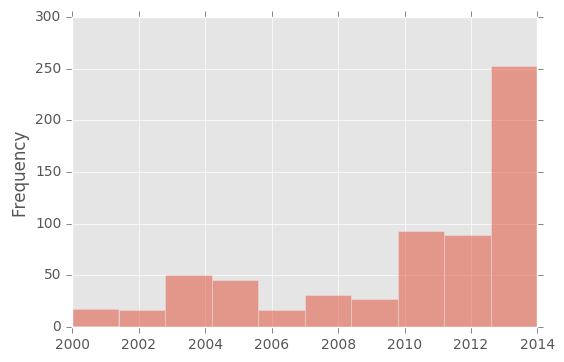

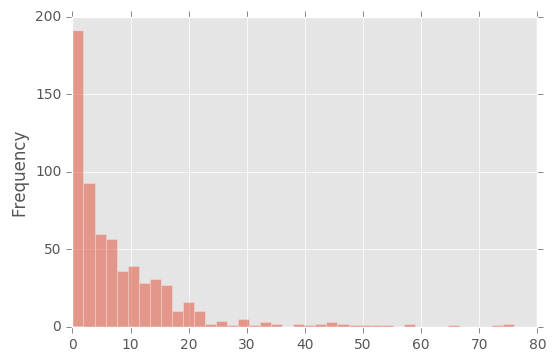

In [52]:
data_filtered.loc[:,'Year']
plt.figure()
data_filtered.loc[:,'Year'].plot.hist(alpha=0.5)
plt.show()

plt.figure()
data_filtered.loc[:,'Sentence.Years'].plot.hist(alpha=0.5, bins=40, )
plt.show()


In [62]:
courts = set()

for index, row in data_filtered.iterrows():
    courts.add(row['Court'].lower())
    print(row['Court'])
    #if row['Court'] == 'FJMC':
    #    print(index, row['text'])


FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJMC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJMC
FJMC
FJHC
FJHC
FJCA
FJHC
FJCA
FJHC
FJHC
FJCA
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJMC
FJHC
FJMC
FJCA
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJMC
FJHC
FJMC
FJHC
FJMC
FJHC
FJHC
FJHC
FJCA
FJHC
FJHC
FJMC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJMC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJCA
FJHC
FJMC
FJHC
FJHC
FJCA
FJHC
FJMC
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJCA
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJCA
FJSC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJHC
FJHC
FJHC
FJCA
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJCA
FJMC
FJHC
FJHC
FJHC
FJHC
FJMC
FJHC
FJMC
FJHC
FJCA
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC
FJHC


In [58]:
courts

{'fjca', 'fjhc', 'fjmc', 'fjsc'}

In [63]:
Court of Appeal of Fiji - FJCA
High Court of Fiji - FJHC

Supreme Court of Fiji - FJSC


SyntaxError: invalid syntax (<ipython-input-63-aa44ab1ed37b>, line 1)

In [68]:
data_filtered.sample(frac=0.1).to_json('sample.json')

In [71]:
import json
import http.client

microsoft_subscription_key = "c734248cabf844249428f7eb4cf492b5"
headers = { 
    # Request headers
    'Content-Type': 'application/json',
    'Ocp-Apim-Subscription-Key': microsoft_subscription_key,
}

text = "Hello, how are you Tom?"

json_body = json.dumps({
  "language": "en",
  "analyzerIds": [
    "4FA79AF1-F22C-408D-98BB-B7D7AEEF7F04",
    "22A6B758-420F-4745-8A3C-46835A67C0D2" ],
  "text": text 
})

print(json_body)

conn = http.client.HTTPSConnection('api.projectoxford.ai')
conn.request("POST", "/linguistics/v1.0/analyze", json_body, headers)
response = conn.getresponse()
lingustics_analysis_data = response.read().decode("utf-8")
conn.close()

print(lingustics_analysis_data)

{"text": "Hello, how are you Tom?", "analyzerIds": ["4FA79AF1-F22C-408D-98BB-B7D7AEEF7F04", "22A6B758-420F-4745-8A3C-46835A67C0D2"], "language": "en"}
[{"analyzerId":"4fa79af1-f22c-408d-98bb-b7d7aeef7f04","result":[["NNP",",","WRB","VBP","PRP","NNP","."]]},{"analyzerId":"22a6b758-420f-4745-8a3c-46835a67c0d2","result":["(TOP (S (UH Hello) (, ,) (SBARQ (WHADVP (WRB how)) (SQ (VBP are) (NP (PRP you)) (NNP Tom)) (. ?))))"]}]


In [75]:
text = """----------------- IN THE HIGH COURT OF FIJI AT SUVA CRIMINAL JURISDICTION CRIMINAL CASE NO: HAC. 127 OF 2010 BETWEEN: STATE PROSECUTION AND: SAKIUSA NAQAU ACCUSED PERSON Counsel: Mr. Prasad Y for State Accused In Person Date of Summing Up : 22nd February 2012 Date of Judgment : 23rd February 2012 Date of Sentence : 2nd March 2012 SENTENCE 1. Sakiusa Naqau, you stand convicted after trial for the offence of Rape contrary to sections 207(1) and 207(2)(b) of the Crimes Decree 2009. 2. The brief facts of the case were that you, with your cousin brother invited the victim and her cousin brother for drinks and had drinks beside the bamboo tree near the Nausori club. After finishing the drinks, when the brother of the victim went to get a taxi to go home, you made sexual advance to the victim. When she refused, you punched her and the victim sustained injuries. You assaulted her, weakened her, removed her T-shirt and the pants and forced her to suck your penis. Victim refused and you inserted your finger into her vagina without her consent. 3. The aggravating factors in this case are that you with your ulterior motive invited the victim for drinks. When the victim refused to consent to your sexual acts, you punched her and assaulted her. She was injured on her face and upper lip due to your assaults. 4. In mitigation, you submitted to court that you are married and having 4 children. Three of them are attending secondary school and the youngest is 18 months old. You are the sole bread winner of the family. You work as a driver for Public Works Department. Your wife is 6 months pregnant. You have no previous convictions within the last 10 years. 5. Further I also consider what is said about you by Pastor Volau Mateyawa by his letter dated 28/02/2011. 6. In the case of Kasim v State (1994) FJCA 25; AAU 0021j.93S (27 May 1994) it was decided that the starting point for sentencing an adult in any rape case without aggravating or mitigating features, should be a term of imprisonment of 7 years. 7. In Mohammed Kasim's case court said: "While it is undoubted that the gravity of rape cases will differ widely depending on all the circumstances, we think the time has come for this Court to give a clear guidance to the Courts in Fiji generally on this matter. We consider that in any rape case without aggravating or mitigating features the starting point for sentencing an adult should be a term of imprisonment of seven years. It must be recognized by the Courts that the crime of rape has become altogether too frequent and that the sentences imposed by the Courts for that crime must more nearly reflect the understandable public outrage. We must stress, however, that the particular circumstances of a case will mean that there are cases where the proper sentence may be substantially higher or substantially lower than that starting point". 8. I take 7 years imprisonment as the starting point. I add 5 years for the aggravating factors mentioned above which I consider very seriously the fact that you assaulted the victim injuring her when she refused to consent. Now your interim total sentence is 12 years. I deduct 3 years for your mitigating factors mentioned before, making the interim total to 9 years. 9. Your final sentence is 9 years imprisonment. 10. You are not eligible to be released on parole until you serve a minimum period of 7 years. Priyantha Fernando Judge At Suva 2nd March 2012"""

In [85]:
text

m = re.split(r'( \(?[0-9ivx]{1,2}[\.\]\)] )', text)
for line in m:
    print(line, '\n')

----------------- IN THE HIGH COURT OF FIJI AT SUVA CRIMINAL JURISDICTION CRIMINAL CASE NO: HAC. 127 OF 2010 BETWEEN: STATE PROSECUTION AND: SAKIUSA NAQAU ACCUSED PERSON Counsel: Mr. Prasad Y for State Accused In Person Date of Summing Up : 22nd February 2012 Date of Judgment : 23rd February 2012 Date of Sentence : 2nd March 2012 SENTENCE 

 1.  

Sakiusa Naqau, you stand convicted after trial for the offence of Rape contrary to sections 207(1) and 207(2)(b) of the Crimes Decree 2009. 

 2.  

The brief facts of the case were that you, with your cousin brother invited the victim and her cousin brother for drinks and had drinks beside the bamboo tree near the Nausori club. After finishing the drinks, when the brother of the victim went to get a taxi to go home, you made sexual advance to the victim. When she refused, you punched her and the victim sustained injuries. You assaulted her, weakened her, removed her T-shirt and the pants and forced her to suck your penis. Victim refused and 

In [130]:
data.loc[7927]

title                              Nasolo v Singh [2005] FJHC 692; HBC0118.2002L ...
text                               ----------------- IN THE HIGH COURT OF FIJI AT...
id                                                                              3825
Year                                                                            2005
Court                                                                           FJHC
Domestic.Violence                                                              False
Domestic.Violence.Manual                                                        True
Sexual.Assault                                                                 False
Sexual.Assault.Manual                                                          False
Non.SA.DV.case                                                                 False
Strength.of.DV                                                                     2
Strength.of.SA                                                   